## **We created this project in order to find out if a person is having diabetes or not. The main feature for detecting diabetes is blood glucose. Including blood glucose, we will consider many other features like Insulin,BMI,Skin thickness etc.**

### **Import required libraries**

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

### **Read the dataset**

In [2]:
diabetes = pd.read_csv('diabetes.csv')

### **Do data analysis and check for null values and eliminate them, visualize feature distributions**

In [3]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df_copy=diabetes
df_copy[['SkinThickness','Insulin']]=df_copy[['SkinThickness','Insulin']].replace(0,np.NaN)
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


In [6]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,125.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,29.0,125.0,30.1,0.349,47,1
767,1,93,70,31.0,125.0,30.4,0.315,23,0


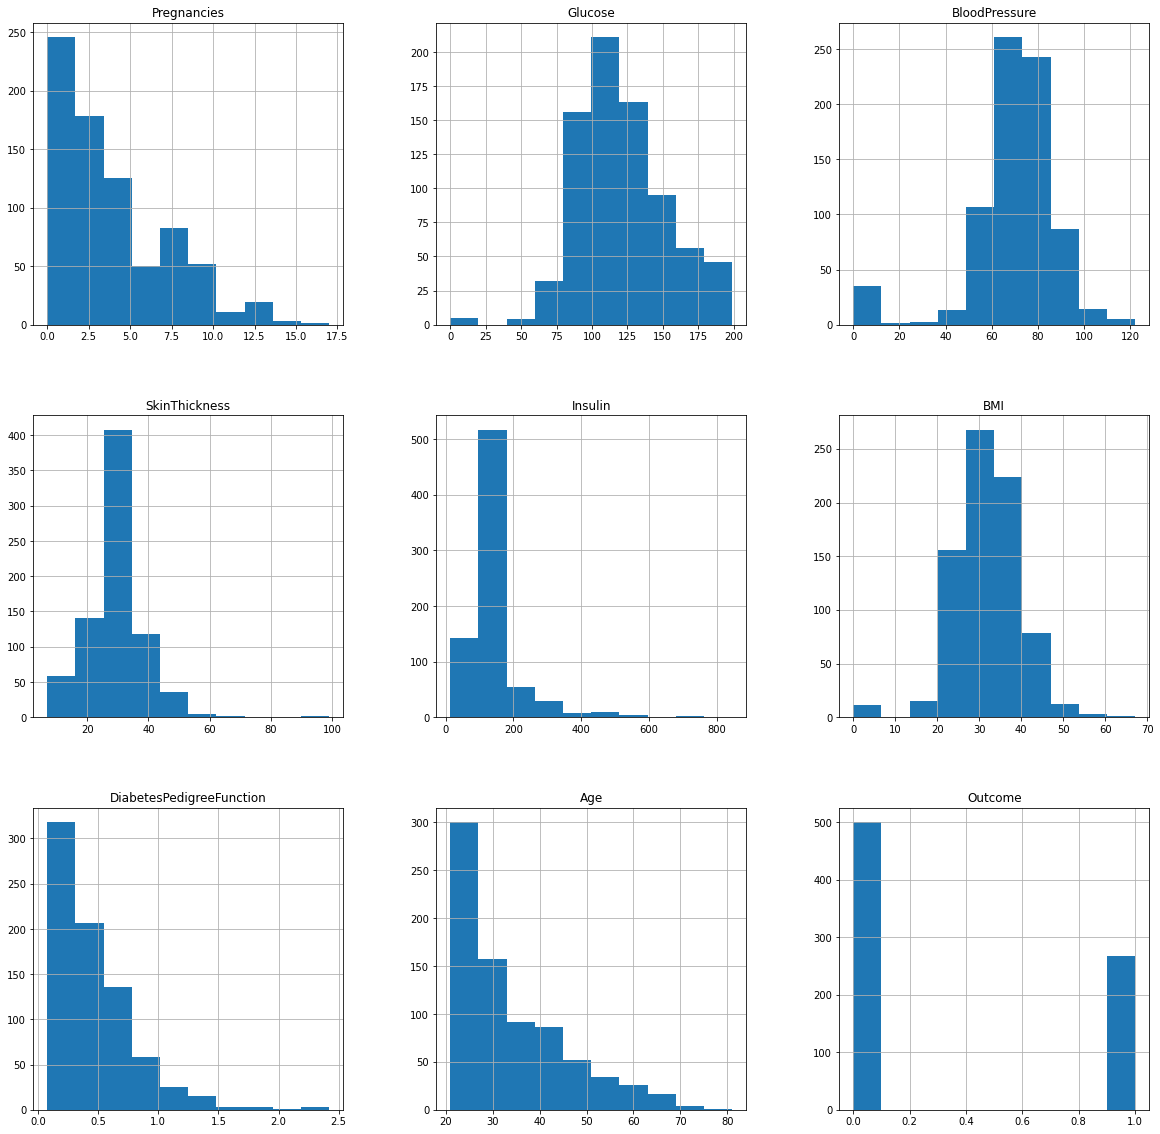

In [8]:
p = df_copy.hist(figsize = (20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


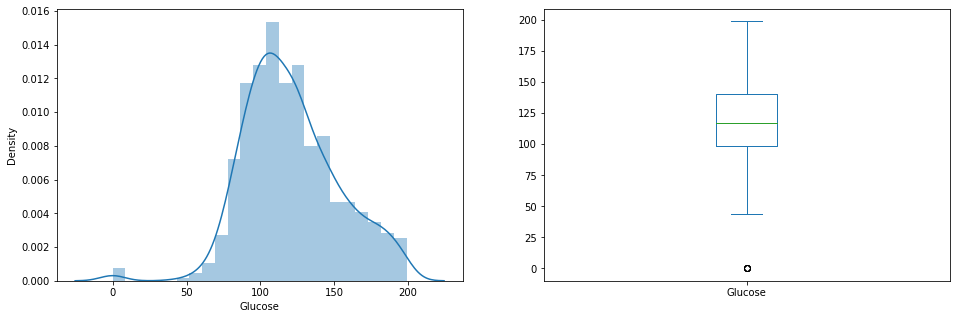

In [9]:
plt.subplot(121), sns.distplot(df_copy['Glucose'])
plt.subplot(122), df_copy['Glucose'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


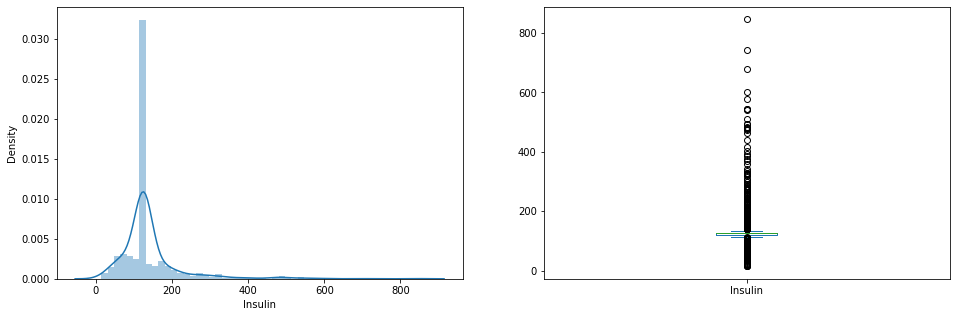

In [13]:
plt.subplot(121), sns.distplot(df_copy['Insulin'])
plt.subplot(122), df_copy['Insulin'].plot.box(figsize=(16,5))
plt.show()

### **The below heatmap shows the correlation between each feature.**

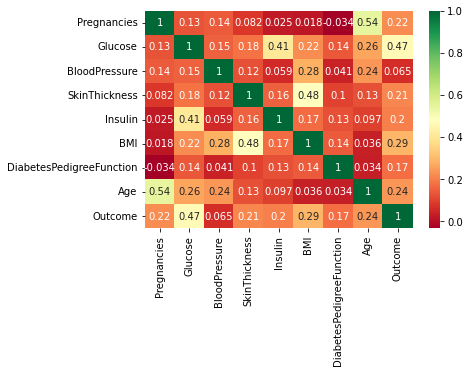

In [11]:
correlation=sns.heatmap(df_copy.corr(),annot=True,cmap='RdYlGn')

### **Devide the data into input and output as X and y variables respectively. Split the devided data into training and testing data**

In [14]:
X=df_copy.drop(['Outcome'],axis=1)
y=df_copy['Outcome']

In [15]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=['Pregnencies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnencies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.670643,-0.181541,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,-0.012301,-0.181541,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-0.012301,-0.181541,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,-0.695245,-0.540642,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.670643,0.316566,1.409746,5.484909,-0.020496


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,train_size=0.7,random_state=7)

### **Create Decision Tree,Random Forest Classifier, XGB, SVM models, initialize them and train them.**
### **Predict the testing results and use accuracy_score, confusion_matrix and classification report to evaluate the model.**

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [53]:
dt_pred=dt.predict(X_test)
dt_accuracy=accuracy_score(y_test,dt_pred)

In [54]:
print("Accuracy_score : ",dt_accuracy)
print("Confusion_matrix :\n",confusion_matrix(y_test,dt_pred))
print("classification_report :\n",classification_report(y_test,dt_pred))

Accuracy_score :  0.7748917748917749
Confusion_matrix :
 [[120  27]
 [ 25  59]]
classification_report :
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       147
           1       0.69      0.70      0.69        84

    accuracy                           0.77       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.77      0.78       231



In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=800)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

In [72]:
rf_pred=rf.predict(X_test)

In [76]:
rf_accuracy=accuracy_score(y_test,rf_pred)

In [74]:
print("Accuracy_score : ",rf_accuracy)
print("Confusion_matrix :\n",confusion_matrix(y_test,rf_pred))
print("classification_report :\n",classification_report(y_test,rf_pred))

Accuracy_score :  0.7619047619047619
Confusion_matrix :
 [[124  23]
 [ 32  52]]
classification_report :
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       147
           1       0.69      0.62      0.65        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



### **Create XGB model, train it and evaluate it**

In [59]:
from xgboost import XGBClassifier
xgb=XGBClassifier(gamma=0)
xgb.fit(X_train,y_train)

XGBClassifier()

In [60]:
xgb_pred=xgb.predict(X_test)
xgb_accuracy=accuracy_score(y_test,xgb_pred)

In [61]:
print("Accuracy_score : ",xgb_accuracy)
print("Confusion_matrix :\n",confusion_matrix(y_test,xgb_pred))
print("classification_report :\n",classification_report(y_test,xgb_pred))

Accuracy_score :  0.7835497835497836
Confusion_matrix :
 [[123  24]
 [ 26  58]]
classification_report :
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       147
           1       0.71      0.69      0.70        84

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



### **Create XGB model, train it and evaluate it**

In [62]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [63]:
svc_pred=svc.predict(X_test)
svc_accuracy=accuracy_score(y_test,svc_pred)

In [64]:
print("Accuracy_score : ",svc_accuracy)
print("Confusion_matrix :\n",confusion_matrix(y_test,svc_pred))
print("classification_report :\n",classification_report(y_test,svc_pred))

Accuracy_score :  0.7705627705627706
Confusion_matrix :
 [[130  17]
 [ 36  48]]
classification_report :
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.74      0.57      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



### **Evaluate the model with some examples**

In [65]:
sc.fit(X)
k=sc.transform([[0,137,40,35.0,168.0,43.1,2.288,33]])
print(k)

[[6.47630098e-17 1.37000000e+02 4.00000000e+01 3.50000000e+01
  1.68000000e+02 4.31000000e+01 2.28800000e+00 3.30000000e+01]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [66]:
rf.predict(k)

array([1])

In [67]:
dt.predict(k)

array([1])

In [68]:
svc.predict(k)

array([0])

In [70]:
xgb.predict(k)

array([1])